### Fill out:
Name & Surname:DENG YUXUAN

Student ID:34254900

## W1&W2 post studio exercises (revision, kNN)

Enter your solution in the cell(s) below each exercise. Add couple of inline comments explaining your code. Don't forget to answer the questions stated in the exercises in markdown cell. Missing comments (in markdown cells and/or inline) and late submissions will incur penalties.

Once done, drag&drop your python file to your ADS1002-name github account.

Copy url of this file on github to appropriate folder on Moodle by 09.30am prior your next studio. 

Solutions will be released later in the semester.

Max 10 marks - 2.5 marks per each exercise.

For these exercises you will use the `penguins` dataset from seaborn. Load it using load_dataset().

In [1]:
# as there were warnings about future changes so far non-affecteing our calculations - we'll import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

### Exercise 1 (cleaning, plotting)

First, create a numerical code for classification rather than using the string value of `species` (add column named, e.g., `code`). 

We will be using columns `flipper length`, `bill depth`, `species`, `code`; drop rows that have at least one missing value in any of these columns. Hint: dropna() and play around with its parameters such as subset etc.

Next, create:

- a feature array which consists of the `flipper length` and `bill depth` (**show first 5 rows**), 

- a target (i.e., Y or outcome) series which consists of the species `code` (**show first 5 values**),

- and an array which contains unique values of species names (**show all**). 

Also, **plot a scatter plot** of the feature array against the target series (include legend). Hint: Plot flipper length against bill depth and colour according to `target series` - label will have 3 levels: 0,1,2. If you would like scatterplot with species names - use penguins column `species`.)

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
4  Adelie  Torgersen            36.7           19.3              193.0   
5  Adelie  Torgersen            39.3           20.6              190.0   

   body_mass_g     sex  species_code  
0       3750.0    Male             0  
1       3800.0  Female             0  
2       3250.0  Female             0  
4       3450.0  Female             0  
5       3650.0    Male             0  
Feature array (first 5 rows):
 [[181.   18.7]
 [186.   17.4]
 [195.   18. ]
 [193.   19.3]
 [190.   20.6]]
Target series (first 5 values):
 [0 0 0 0 0]
Unique species names:
 ['Adelie' 'Chinstrap' 'Gentoo']


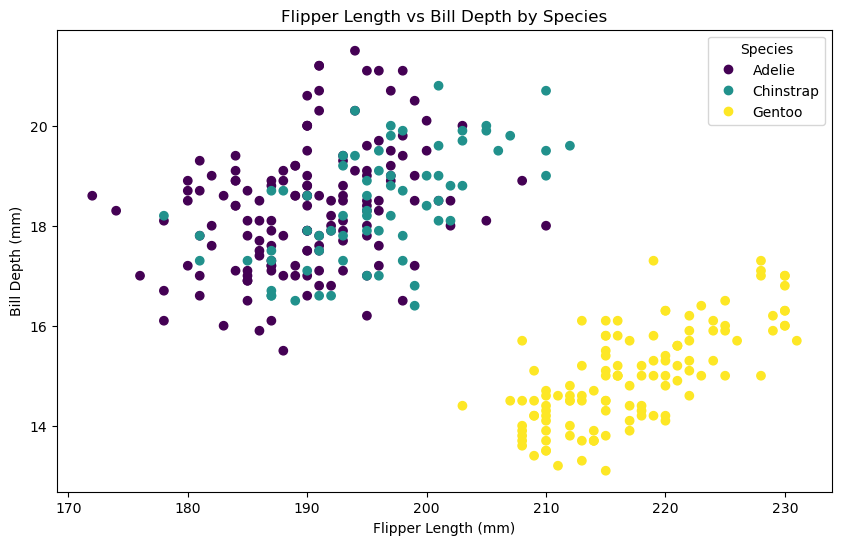

In [12]:

import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Ignore future warnings
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

penguins = sns.load_dataset('penguins')

# Remove missing rows
penguins.dropna(inplace=True)

# Create code for species
penguins['species_code'] = penguins['species'].astype('category').cat.codes

# Display the first five rows 
print(penguins.head())

# Create feature array and target series
X = penguins[['flipper_length_mm', 'bill_depth_mm']].values
y = penguins['species_code'].values
species_names = penguins['species'].unique()

# Show first 5 rows about the feature array and target series
print("Feature array (first 5 rows):\n", X[:5])
print("Target series (first 5 values):\n", y[:5])
print("Unique species names:\n", species_names)

# Plot scatter plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', label=y)
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Bill Depth (mm)')
plt.title('Flipper Length vs Bill Depth by Species')

# Create a legend
handles, _ = scatter.legend_elements()
labels = [species_names[int(label)] for label in np.unique(y)]
plt.legend(handles, labels, title="Species")

plt.show()


### Exercise 2 (kNN - raw data)

Split the data into training and testing set, with and 80:20 split, random state equal to 0. Create a kNN model with 10 nearest neighbours and uniform weights. Train (fit) model on training data. Calculate predictions for feature values in testing set (**show first 5 entries**). **Print accuracy** (import from sklearn.metrics) and **plot confusion matrix** using function from the pre-studio notebook.

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
4  Adelie  Torgersen            36.7           19.3              193.0   
5  Adelie  Torgersen            39.3           20.6              190.0   

   body_mass_g     sex  species_code  
0       3750.0    Male             0  
1       3800.0  Female             0  
2       3250.0  Female             0  
4       3450.0  Female             0  
5       3650.0    Male             0  
First 5 predictions: [0 0 2 0 0]
Accuracy: 0.8656716417910447


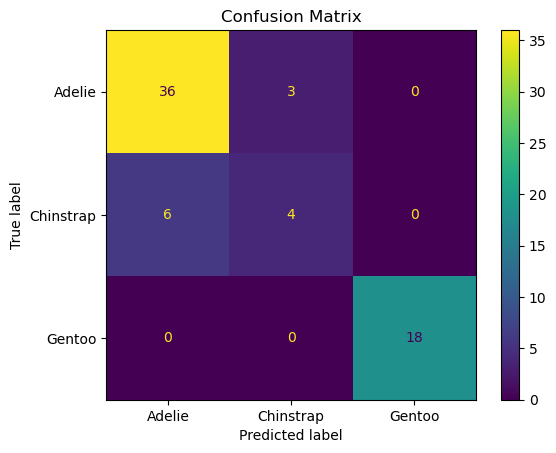

In [9]:

import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Ignore future warnings
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

penguins = sns.load_dataset('penguins')

penguins.dropna(inplace=True)

# Create   code for species
penguins['species_code'] = penguins['species'].astype('category').cat.codes

# Display the first five rows 
print(penguins.head())

# Split the data into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create and train kNN model 
knn = KNeighborsClassifier(n_neighbors=10, weights='uniform')
knn.fit(X_train, y_train)

# Predict the target for the test set
y_pred = knn.predict(X_test)

# Show first 5 entries of the predictions
print("First 5 predictions:", y_pred[:5])

# Calculate and print the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=species_names)
disp.plot(cmap='viridis')
plt.title('Confusion Matrix')
plt.show()


### Exercise 3 (normalisation, plotting)

Our features have quite different variance. Let's see, whether accuracy of kNN model can improve by normalising the the feature array. Divide data in feature array by its standard deviation, **show first 5 rows** and **plot scatterplot of flipper length against bill_depth coloured according to code (or species).**

Normalized feature array (first 5 rows):
 [[12.93346326  9.51036167]
 [13.29074125  8.84921354]
 [13.93384163  9.15435883]
 [13.79093044  9.81550697]
 [13.57656364 10.47665511]]


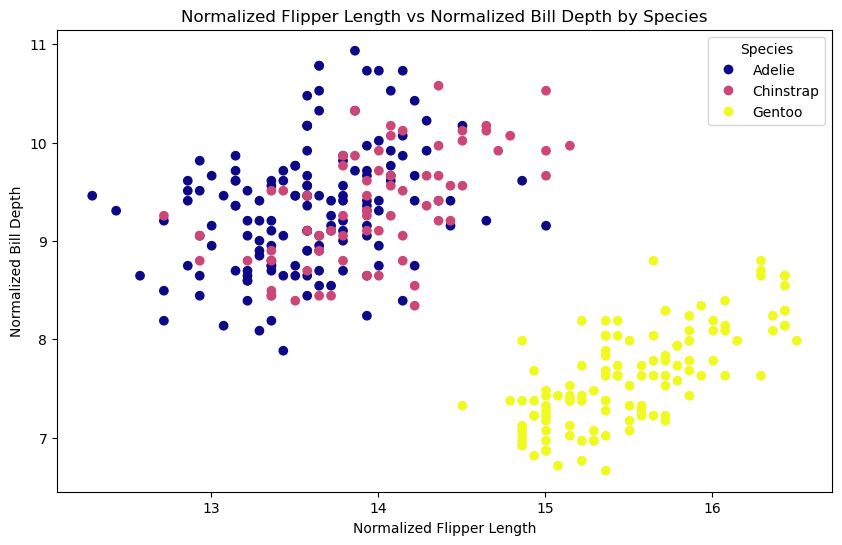

In [18]:

import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Ignore future warnings
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

# Load the penguins dataset
penguins = sns.load_dataset('penguins')

# remove the missing rows
penguins.dropna(inplace=True)

# Create a numerical code for species
penguins['species_code'] = penguins['species'].astype('category').cat.codes

# Normalize the feature array 
X = penguins[['flipper_length_mm', 'bill_depth_mm']].values
X_normalized = X / np.std(X, axis=0)
y = penguins['species_code'].values
species_names = penguins['species'].unique()

# Show first 5 rows of the normalized feature array
print("Normalized feature array (first 5 rows):\n", X_normalized[:5])

# Plot scatter plot of normalized data with different colormap
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_normalized[:, 0], X_normalized[:, 1], c=y, cmap='plasma')
plt.xlabel('Normalized Flipper Length')
plt.ylabel('Normalized Bill Depth')
plt.title('Normalized Flipper Length vs Normalized Bill Depth by Species')

# Create a legend using species names
handles, labels = scatter.legend_elements(prop="colors")
legend_labels = [species_names[int(label.split("{")[-1].split("}")[0])] for label in labels]
plt.legend(handles, legend_labels, title="Species")

plt.show()


### Exercise 4 (kNN - normalised data)

Repeat Ex 2 on normalised data created in Ex 3. **Show accuracy score, plot confusion matrix. Did the accuracy score improve?**

First 5 predictions (normalized): [0 0 2 0 0]
Accuracy (normalized): 0.8656716417910447


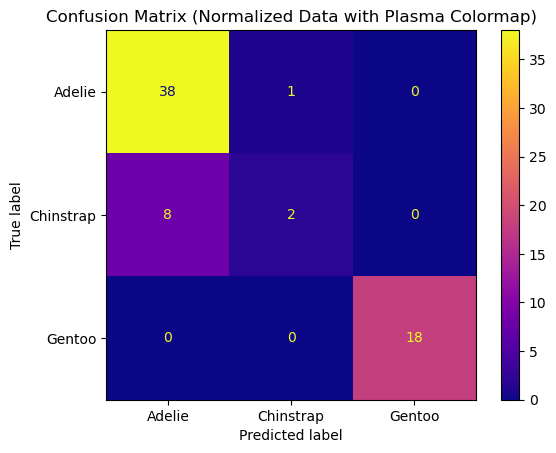

In [16]:
# Split the data into training and testing sets
X_train_norm, X_test_norm, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=0)

# Create and train a kNN model with nearest neighbors
knn_norm = KNeighborsClassifier(n_neighbors=10, weights='uniform')
knn_norm.fit(X_train_norm, y_train)

# Predict the target 
y_pred_norm = knn_norm.predict(X_test_norm)

# Show first 5 entries of the predictions for normalized data
print("First 5 predictions (normalized):", y_pred_norm[:5])

# Calculate and print  score for normalized data
accuracy_norm = accuracy_score(y_test, y_pred_norm)
print("Accuracy (normalized):", accuracy_norm)

# Plot confusion matrix for normalized data
conf_matrix_norm = confusion_matrix(y_test, y_pred_norm)
disp_norm = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_norm, display_labels=species_names)

# Use a different color map (
disp_norm.plot(cmap='plasma')
plt.title('Confusion Matrix (Normalized Data with Plasma Colormap)')
plt.show()
